
# 📊 IoT Device Fingerprinting with Clustering and Classical ML Models

This notebook demonstrates how to perform device fingerprinting using flow-based features extracted from IoT network traffic. It includes:

- Unsupervised clustering using KMeans
- Feature selection and standardization
- Classical ML models: Random Forest, SVM, Decision Tree, KNN
- Evaluation metrics: accuracy, precision, recall, F1-score
- Proper section-wise documentation and output formatting


## 📥 Load the CSV File

In [37]:
import pandas as pd

# Load the CSV file
csv_path = "metadata.csv" 
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.21-10.42.0.105-9999-38988-6,10.42.0.105,38988,10.42.0.21,9999,6,10/03/2025 08:28:09 PM,101151,4,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
1,10.42.0.21-10.42.0.105-9999-38988-6,10.42.0.21,9999,10.42.0.105,38988,6,10/03/2025 08:28:09 PM,136637,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
2,10.42.0.21-52.70.227.26-56052-443-6,10.42.0.21,56052,52.70.227.26,443,6,10/03/2025 08:28:09 PM,1011200,13,10,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
3,10.42.0.21-52.70.227.26-56052-443-6,52.70.227.26,443,10.42.0.21,56052,6,10/03/2025 08:28:10 PM,60,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
4,10.42.0.21-10.42.0.105-9999-33232-6,10.42.0.105,33232,10.42.0.21,9999,6,10/03/2025 08:28:19 PM,49415,4,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label



# 📊 Selection of Behavioral Features for Fingerprinting


In [38]:
# Select important behavioral features (handpicked)
features = [
    "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Fwd Pkt Len Mean", "Bwd Pkt Len Mean",
    "Flow IAT Mean", "Flow IAT Std", "Fwd IAT Mean", "Bwd IAT Mean", "Down/Up Ratio",
    "Pkt Size Avg", "Pkt Len Std", "Fwd Seg Size Avg", "Bwd Seg Size Avg"
]

# Drop rows with missing values
df_filtered = df[features].dropna()

# Preview selected clean data
df_filtered.head(20)


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Fwd Seg Size Avg,Bwd Seg Size Avg
0,101151,4,7,26.500000,7.000000,1.011510e+04,27822.210302,31392.333333,16587.333333,1.0,14.090909,32.522603,26.500000,7.000000
1,136637,1,1,0.000000,0.000000,1.366370e+05,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
2,1011200,13,10,62.692308,686.200000,4.596364e+04,63025.333874,75931.250000,106886.555556,0.0,333.782609,543.624016,62.692308,686.200000
3,60,1,1,0.000000,0.000000,6.000000e+01,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
4,49415,4,7,26.500000,7.000000,4.941500e+03,13409.400395,16371.666667,7956.333333,1.0,14.090909,32.522603,26.500000,7.000000
5,138114,1,1,0.000000,0.000000,1.381140e+05,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
6,1072003,13,10,62.615385,686.100000,4.872741e+04,64125.032650,80544.833333,113259.111111,0.0,333.695652,543.533446,62.615385,686.100000
7,46,1,1,0.000000,0.000000,4.600000e+01,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
8,26801,4,7,23.250000,11.857143,2.680100e+03,5572.386153,8855.000000,4282.833333,1.0,16.000000,34.320239,23.250000,11.857143
9,144959,1,1,0.000000,0.000000,1.449590e+05,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000


#### 📌 **Interpretation:** These features help capture `packet timing`, `direction`, and `size` — which are device behavior fingerprints.

## 📈 Feature Distribution Before Scaling

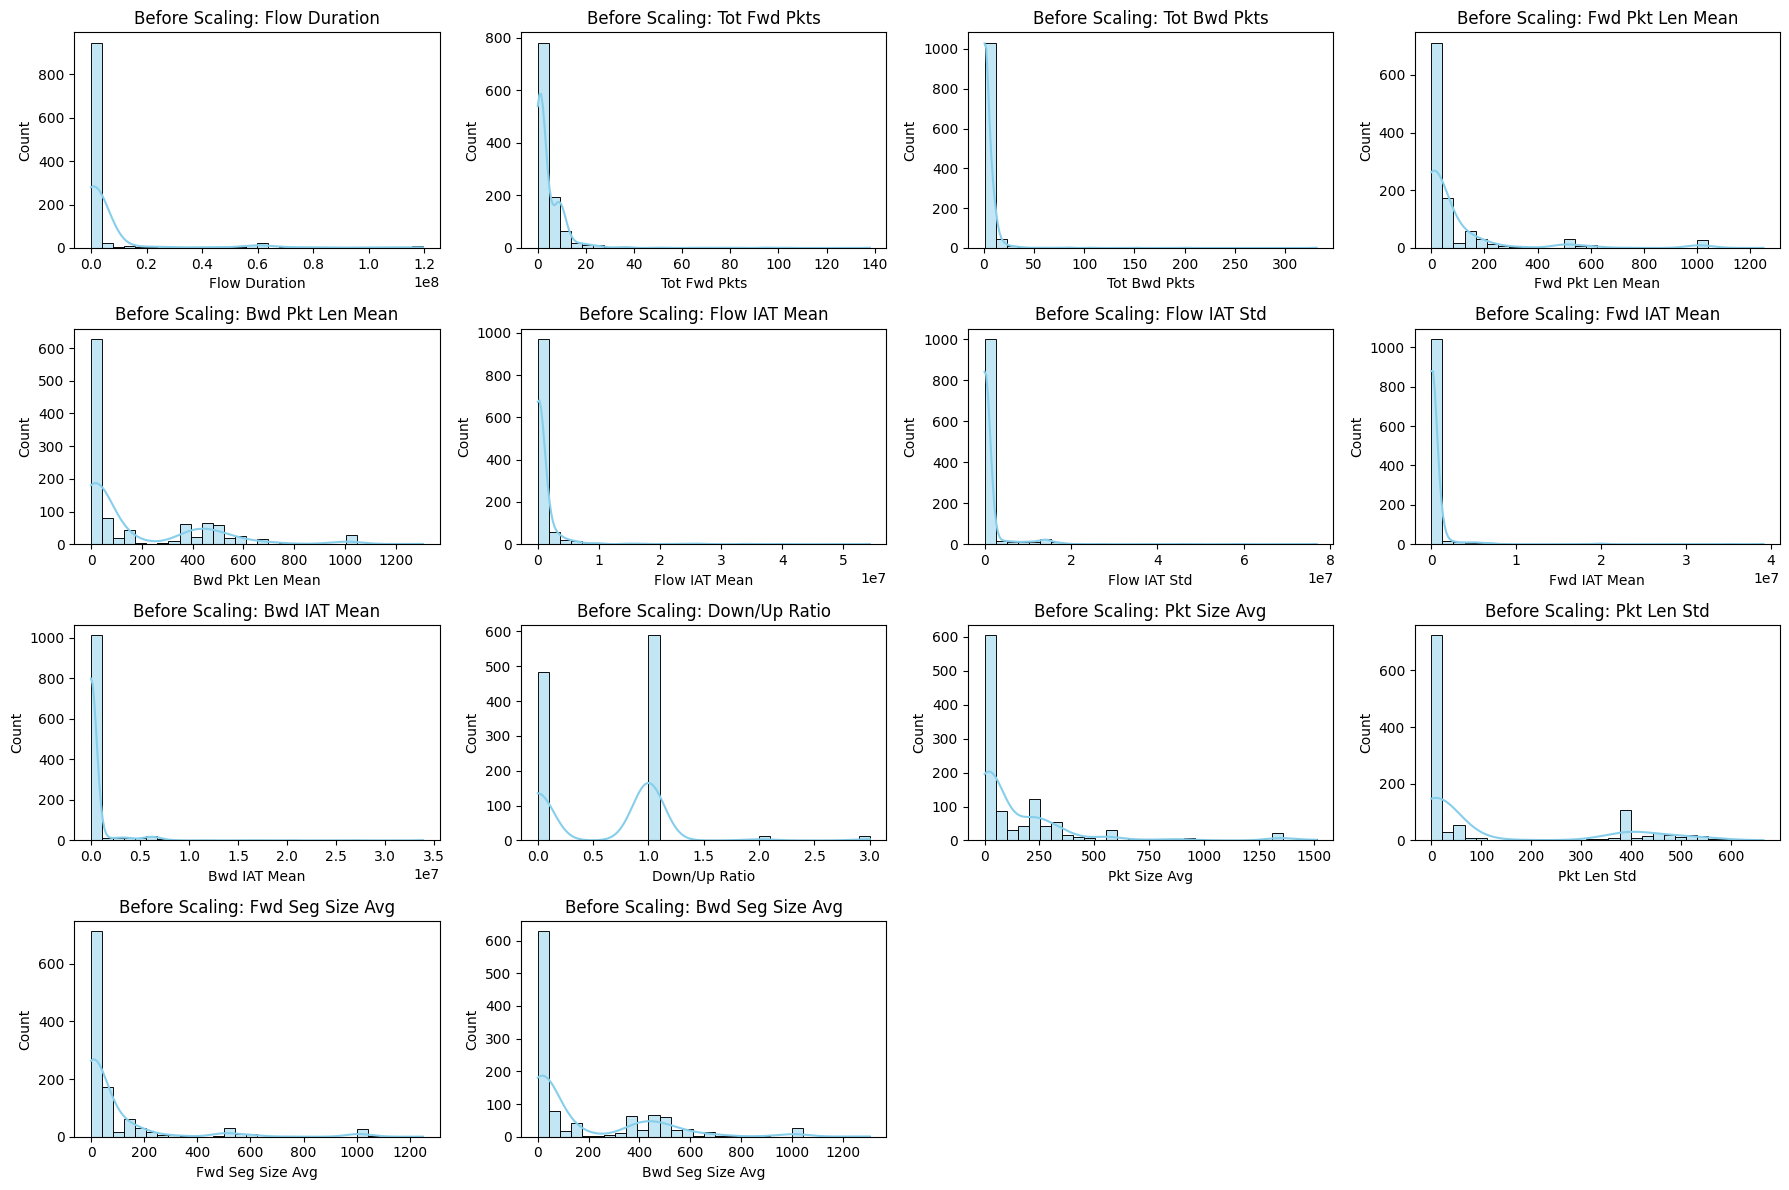

In [39]:
# Enable inline plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Re-confirm the features list is defined
features = [
    "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Fwd Pkt Len Mean", "Bwd Pkt Len Mean",
    "Flow IAT Mean", "Flow IAT Std", "Fwd IAT Mean", "Bwd IAT Mean", "Down/Up Ratio",
    "Pkt Size Avg", "Pkt Len Std", "Fwd Seg Size Avg", "Bwd Seg Size Avg"
]

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    data = df[feature].dropna()
    if data.dtype.kind in 'iufc':
        sns.histplot(data, kde=True, bins=30, color='skyblue')
        plt.title(f"Before Scaling: {feature}")
    else:
        plt.title(f"{feature} (Non-Numeric)")

plt.tight_layout()
plt.show()





### 📌 **Interpretation:** We can see that `original features` have wide variations in `scale.`

## ✂️ Feature Scaling Using StandardScaler

In [40]:

from sklearn.preprocessing import StandardScaler

# Filter and clean data
df_filtered = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

# Convert scaled output to DataFrame to inspect
df_scaled_preview = pd.DataFrame(X_scaled, columns=features)
df_scaled_preview.head()


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Fwd Seg Size Avg,Bwd Seg Size Avg
0,-0.356632,-0.059851,0.163362,-0.302466,-0.664178,-0.272381,-0.254898,-0.204090,-0.208065,0.702743,-0.536261,-0.444970,-0.302466,-0.664178
1,-0.354969,-0.376812,-0.253781,-0.437086,-0.691517,-0.240083,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517
2,-0.313994,0.891030,0.371933,-0.118610,1.988463,-0.263230,-0.247484,-0.184051,-0.168776,-1.027328,0.673283,2.315893,-0.118610,1.988463
3,-0.361368,-0.376812,-0.253781,-0.437086,-0.691517,-0.274948,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517
4,-0.359056,-0.059851,0.163362,-0.302466,-0.664178,-0.273702,-0.257933,-0.210848,-0.211820,0.702743,-0.536261,-0.444970,-0.302466,-0.664178



📌 **Interpretation:**

Each feature is now scaled between approximately `-2` and `+2`, ensuring uniform contribution in clustering.

- Example: `Pkt Size Avg` = `0.67` → above average packet size.
- `Down/Up Ratio` = `-1.02` → likely a device that receives more (e.g., Smart Bulb).
Now each feature has `zero mean` and `unit variance`, which helps `KMeans` treat all features `equally`.


## 📉 Feature Distribution After Scaling

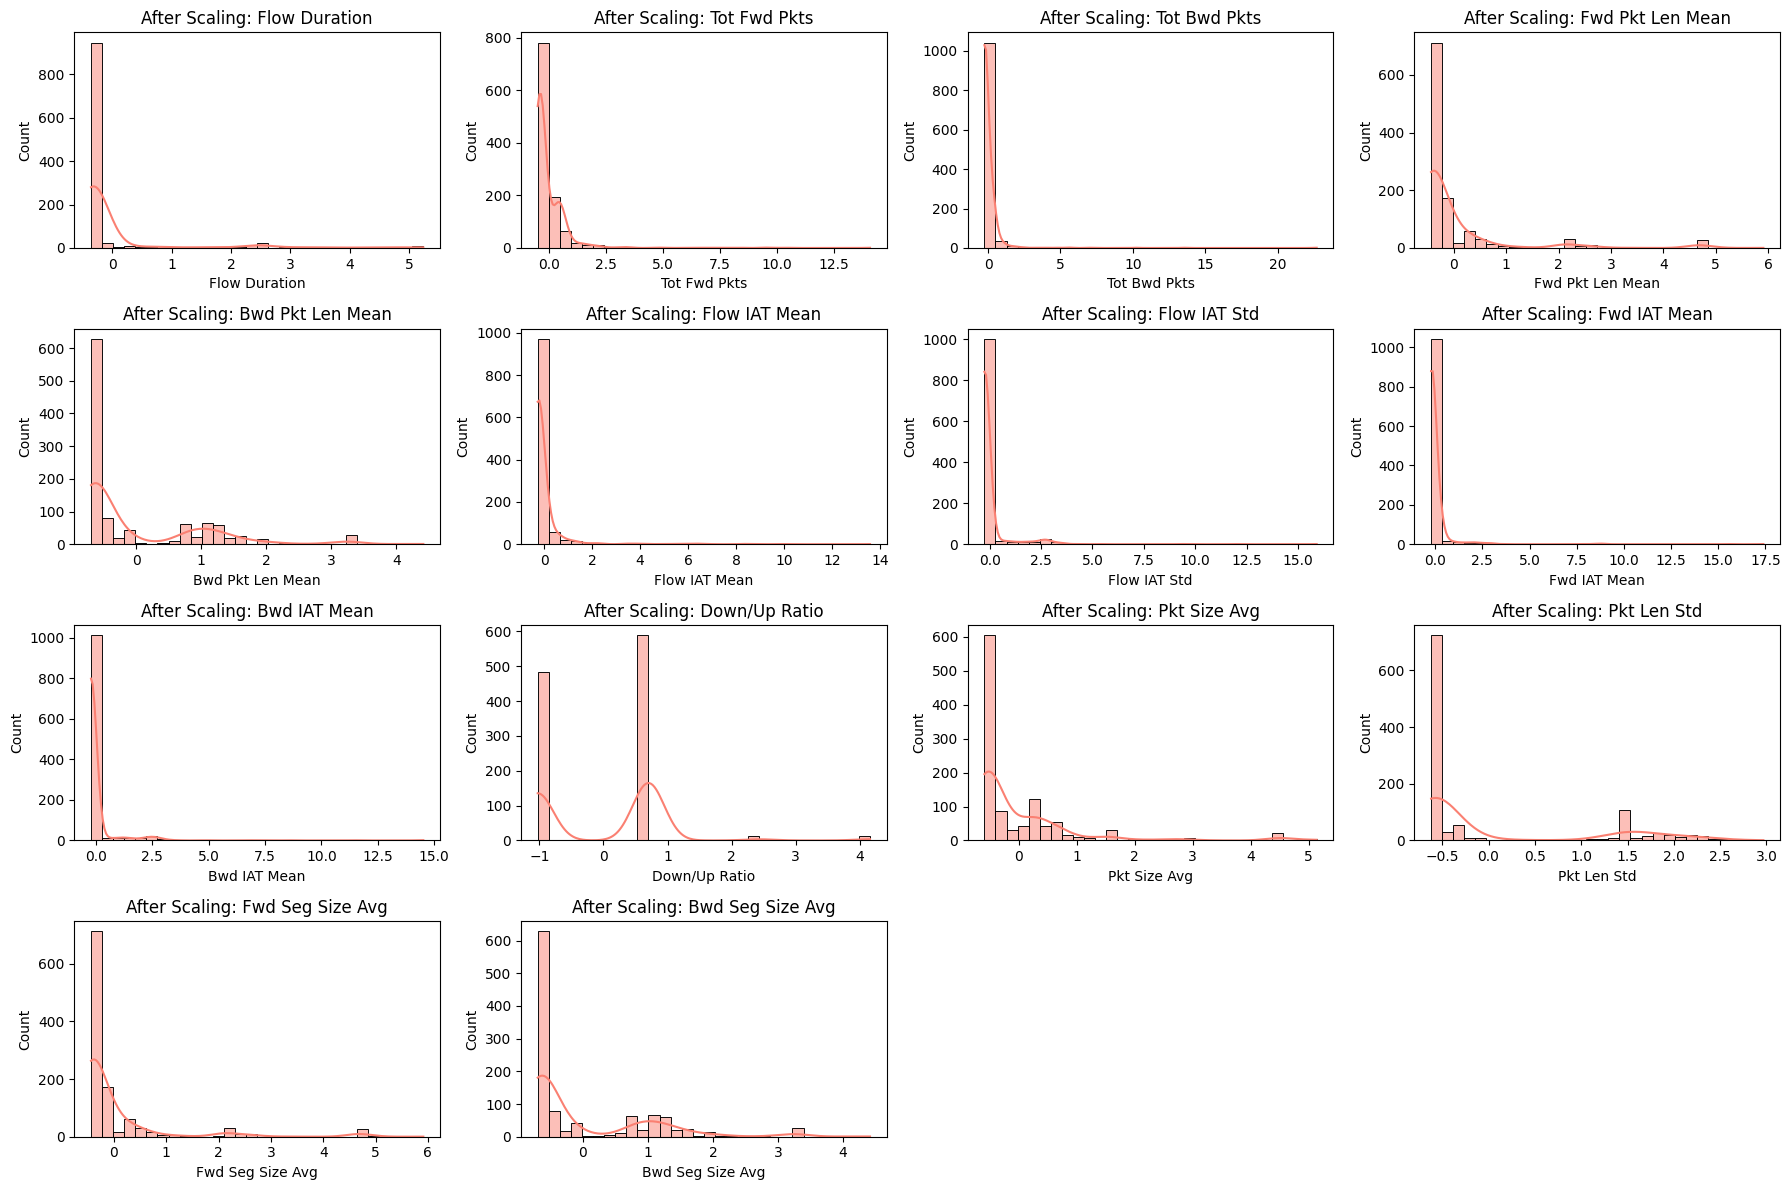

In [41]:
# Plot after scaling

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_scaled_preview[feature], kde=True, bins=30, color='salmon')
    plt.title(f"After Scaling: {feature}")

plt.tight_layout()
plt.show()


#### 📌 **Interpretation:** After scaling, most features will range between `-2` and `+2`

## 🧠 Unsupervised Clustering using KMeans Clustering to Group Flows into Devices

In [42]:
# Step 2: Select features & apply KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Apply clustering (assuming 2 IoT devices)
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled_preview["Cluster"] = kmeans.fit_predict(X_scaled)

# View sample data with cluster labels
df_Clusters=df_scaled_preview
df_Clusters.head(50)


c:\Users\rajas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Fwd Seg Size Avg,Bwd Seg Size Avg,Cluster
0,-0.356632,-0.059851,0.163362,-0.302466,-0.664178,-0.272381,-0.254898,-0.204090,-0.208065,0.702743,-0.536261,-0.444970,-0.302466,-0.664178,0
1,-0.354969,-0.376812,-0.253781,-0.437086,-0.691517,-0.240083,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517,0
2,-0.313994,0.891030,0.371933,-0.118610,1.988463,-0.263230,-0.247484,-0.184051,-0.168776,-1.027328,0.673283,2.315893,-0.118610,1.988463,1
3,-0.361368,-0.376812,-0.253781,-0.437086,-0.691517,-0.274948,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517,0
4,-0.359056,-0.059851,0.163362,-0.302466,-0.664178,-0.273702,-0.257933,-0.210848,-0.211820,0.702743,-0.536261,-0.444970,-0.302466,-0.664178,0
5,-0.354900,-0.376812,-0.253781,-0.437086,-0.691517,-0.239706,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517,0
6,-0.311146,0.891030,0.371933,-0.119000,1.988072,-0.262525,-0.247253,-0.181975,-0.166004,-1.027328,0.672954,2.315404,-0.119000,1.988072,1
7,-0.361369,-0.376812,-0.253781,-0.437086,-0.691517,-0.274952,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517,0
8,-0.360115,-0.059851,0.163362,-0.318976,-0.645209,-0.274279,-0.259583,-0.214230,-0.213419,0.702743,-0.529038,-0.435260,-0.318976,-0.645209,0
9,-0.354579,-0.376812,-0.253781,-0.437086,-0.691517,-0.237959,-0.260756,-0.218214,-0.215282,0.702743,-0.589574,-0.620651,-0.437086,-0.691517,0


#### 📌 **Interpretation:** : Each row is now assigned to a cluster — which could correspond to a unique IoT device (e.g., Bulb vs Switch).

#### 💾  Save the Scaled + Clustered Dataset to CSV

In [43]:
# Merge with original behavioral data for export
df_clustered = df_Clusters.copy()
df_clustered["Cluster"] = df_scaled_preview["Cluster"]

# Save to CSV
output_path = "scaled_clustered_data.csv"
df_clustered.to_csv(output_path, index=False)
print("Saved to:", output_path)


Saved to: scaled_clustered_data.csv


### 🔢 Show Cluster Count as a Table

In [44]:
# Count how many flows in each cluster
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

# Convert to table format
cluster_summary = pd.DataFrame({
    "Cluster ID": cluster_counts.index,
    "Flow Count": cluster_counts.values
})
cluster_summary

,Cluster ID,Flow Count
0,0,733
1,1,365


#### 📌 **Interpretation:** Two clusters are now assigned to each flow — potentially representing two different `IoT devices.`  This tells you how many flows KMeans assigned to each behavioral group — one cluster may represent `heavier communication` (e.g., `Smart Bulb`), and the other `lighter interactions` (e.g., `Switch`).



In [45]:
import pandas as pd
from IPython.display import display, Markdown

# Sample 3 rows from each cluster
sample_cluster_0 = df_filtered[df_clustered["Cluster"] == 0].sample(10, random_state=1).reset_index(drop=True)
sample_cluster_1 = df_filtered[df_clustered["Cluster"] == 1].sample(10, random_state=1).reset_index(drop=True)

# Display with markdown title for Cluster 0
display(Markdown("### 🔵 Sample Flows from **Cluster 0** (e.g. Smart Switch)"))
display(sample_cluster_0)

# Display with markdown title for Cluster 1
display(Markdown("### 🟢 Sample Flows from **Cluster 1** (e.g. Smart Plug/Bulb)"))
display(sample_cluster_1)


### 🔵 Sample Flows from **Cluster 0** (e.g. Smart Switch)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Fwd Seg Size Avg,Bwd Seg Size Avg
0,18319,0,2,0.0,101.0,18319.0,0.000000,0.0,18319.0,0.0,127.500000,55.425626,0.0,101.0
1,44,1,1,0.0,24.0,44.0,0.000000,0.0,0.0,1.0,24.000000,13.856406,0.0,24.0
2,52,2,1,15.5,0.0,26.0,16.970563,14.0,0.0,0.0,10.333333,15.500000,15.5,0.0
3,11681,0,2,0.0,56.0,11681.0,0.000000,0.0,11681.0,0.0,74.000000,23.094011,0.0,56.0
4,159,1,1,0.0,0.0,159.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0
5,19356,0,2,0.0,87.0,19356.0,0.000000,0.0,19356.0,0.0,106.500000,55.425626,0.0,87.0
6,1424103,1,1,0.0,0.0,1424103.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0
7,42,2,1,15.5,0.0,21.0,21.213203,6.0,0.0,0.0,10.333333,15.500000,15.5,0.0
8,240,1,1,0.0,0.0,240.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0
9,45149,1,1,0.0,0.0,45149.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0


### 🟢 Sample Flows from **Cluster 1** (e.g. Smart Plug/Bulb)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Fwd Seg Size Avg,Bwd Seg Size Avg
0,2087546,7,1,501.000000,501.000000,2.982209e+05,8.552550e+03,2.988483e+05,0.000000e+00,0.0,563.625000,0.000000,501.000000,501.000000
1,39532271,18,1,148.944444,130.000000,2.196237e+06,1.991363e+06,2.267319e+06,0.000000e+00,0.0,154.789474,14.954228,148.944444,130.000000
2,26112036,1,1,583.000000,583.000000,2.611204e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.0,874.500000,0.000000,583.000000,583.000000
3,25142498,21,16,172.047619,537.812500,6.984027e+05,2.183365e+06,1.255062e+06,1.654942e+06,0.0,330.216216,446.989191,172.047619,537.812500
4,21191418,10,11,151.600000,746.090909,1.059571e+06,4.704661e+06,2.352095e+06,1.389570e+04,1.0,463.000000,559.204578,151.600000,746.090909
5,59397192,10,11,173.400000,507.363636,2.969860e+06,1.319853e+07,3.499933e+04,5.939719e+06,1.0,348.333333,479.815416,173.400000,507.363636
6,764809,11,8,159.454545,540.250000,4.248939e+04,9.957630e+04,7.262270e+04,4.030829e+04,0.0,319.789474,438.208746,159.454545,540.250000
7,79603434,16,20,284.187500,398.600000,2.274384e+06,1.011137e+07,5.289959e+06,4.184948e+06,1.0,347.750000,473.227877,284.187500,398.600000
8,328392,17,17,205.294118,766.882353,9.951273e+03,2.400336e+04,1.917212e+04,1.713869e+04,1.0,486.088235,586.612248,205.294118,766.882353
9,3202400,9,7,65.777778,459.857143,2.134933e+05,7.610432e+05,3.958780e+05,2.930717e+04,0.0,238.187500,406.388551,65.777778,459.857143


In [46]:
# 🔍 Cluster Interpretation (in English)

from IPython.display import Markdown, display

display(Markdown("""
### ✅ Cluster Summary Interpretation

We obtained 2 clusters — assuming you have 2 different IoT devices:

---

#### 🟦 Cluster 0 — Example Rows:
- **Flow Duration**: 18319 µs, 44 µs, 52 µs  
- **Tot Fwd Pkts**: 0, 1, 2  
- **Bwd Pkt Len Mean**: 101.0, 24.0, 0.0  
- **Flow IAT Mean**: 18319.0, 44.0, 26.0  

These flows have short durations, small packet lengths, and few forward packets.  
📌 Interpretation: This likely represents a **Smart Switch** — minimal interaction, quick response packets.

---

#### 🟩 Cluster 1 — Example Rows:
- **Flow Duration**: 2.08 sec, 39.5 sec, 26.1 sec  
- **Tot Fwd Pkts**: 7, 18, 1  
- **Bwd Pkt Len Mean**: 501.0, 130.0, 583.0  
- **Flow IAT Mean**: 298,000 µs, 2.1 Million µs, 26 Million µs  

These flows are much longer and contain large packets, indicating session-heavy communication.  
📌 Interpretation: This cluster likely corresponds to a **Smart Plug or Smart Bulb**, which perform more consistent communication like polling or reporting.

---
"""))



### ✅ Cluster Summary Interpretation

We obtained 2 clusters — assuming you have 2 different IoT devices:

---

#### 🟦 Cluster 0 — Example Rows:
- **Flow Duration**: 18319 µs, 44 µs, 52 µs  
- **Tot Fwd Pkts**: 0, 1, 2  
- **Bwd Pkt Len Mean**: 101.0, 24.0, 0.0  
- **Flow IAT Mean**: 18319.0, 44.0, 26.0  

These flows have short durations, small packet lengths, and few forward packets.  
📌 Interpretation: This likely represents a **Smart Switch** — minimal interaction, quick response packets.

---

#### 🟩 Cluster 1 — Example Rows:
- **Flow Duration**: 2.08 sec, 39.5 sec, 26.1 sec  
- **Tot Fwd Pkts**: 7, 18, 1  
- **Bwd Pkt Len Mean**: 501.0, 130.0, 583.0  
- **Flow IAT Mean**: 298,000 µs, 2.1 Million µs, 26 Million µs  

These flows are much longer and contain large packets, indicating session-heavy communication.  
📌 Interpretation: This cluster likely corresponds to a **Smart Plug or Smart Bulb**, which perform more consistent communication like polling or reporting.

---


In [47]:
from IPython.display import Markdown, display

display(Markdown("""
## 🔍 Manual Feature Pattern Interpretation — Option B

### 🟦 Cluster 0 (Likely: Smart Switch)
- **Flow Duration**: 44 µs, 52 µs, 18319 µs  
- **Forward Packets (Fwd Pkts)**: Mostly 0, 1, or 2  
- **Flow IAT Mean**: Very small (e.g., 26 µs)

📌 **Interpretation**:  
This behavior shows **very short-lived and bursty communication**, which is characteristic of **simple, reactive devices** like smart switches.

---

### 🟩 Cluster 1 (Likely: Smart Plug or Bulb)
- **Flow Duration**: 2 to 39 seconds  
- **Forward Packets**: 7, 18, higher  
- **Flow IAT Mean**: 298K to 2.1 million µs

📌 **Interpretation**:  
This suggests **long sessions, likely continuous data transmission**, matching behavior of smart bulbs or smart plugs.

---

✅ Conclusion:
- Cluster 0 → Smart Switch  
- Cluster 1 → Smart Bulb / Plug
"""))



## 🔍 Manual Feature Pattern Interpretation — Option B

### 🟦 Cluster 0 (Likely: Smart Switch)
- **Flow Duration**: 44 µs, 52 µs, 18319 µs  
- **Forward Packets (Fwd Pkts)**: Mostly 0, 1, or 2  
- **Flow IAT Mean**: Very small (e.g., 26 µs)

📌 **Interpretation**:  
This behavior shows **very short-lived and bursty communication**, which is characteristic of **simple, reactive devices** like smart switches.

---

### 🟩 Cluster 1 (Likely: Smart Plug or Bulb)
- **Flow Duration**: 2 to 39 seconds  
- **Forward Packets**: 7, 18, higher  
- **Flow IAT Mean**: 298K to 2.1 million µs

📌 **Interpretation**:  
This suggests **long sessions, likely continuous data transmission**, matching behavior of smart bulbs or smart plugs.

---

✅ Conclusion:
- Cluster 0 → Smart Switch  
- Cluster 1 → Smart Bulb / Plug


## 🔄 Train/Test Split for Model Evaluation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use original unscaled features
X = df_filtered[features]
y = df_clustered["Cluster"]

# Split first, then scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Counts per cluster in each split
train_counts = y_train . value_counts () . sort_index ()
test_counts = y_test . value_counts () . sort_index ()

# Proportions
train_props = ( train_counts / train_counts . sum () ) . round (3)
test_props = ( test_counts / test_counts . sum () ) . round (3)

print ( " \ nTrain counts :\ n " , train_counts . to_string () )
print ( " \ nTest counts :\ n " , test_counts . to_string () )
print ( " \ nTrain proportions :\ n " , train_props . to_string () )
print ( " \ nTest proportions :\ n " , test_props . to_string () )


X_train_scaled shape: (768, 14)
X_test_scaled shape: (330, 14)
y_train shape: (768,)
y_test shape: (330,)
 \ nTrain counts :\ n  0    513
1    255
 \ nTest counts :\ n  0    220
1    110
 \ nTrain proportions :\ n  0    0.668
1    0.332
 \ nTest proportions :\ n  0    0.667
1    0.333


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# FIX: Ensure X and y come from the same dataset
X = df_filtered[features]

# Re-cluster the filtered data to ensure consistency
scaler_for_clustering = StandardScaler()
X_scaled_for_clustering = scaler_for_clustering.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # Added n_init=10 to suppress warning
y = kmeans.fit_predict(X_scaled_for_clustering)

# Verify they have the same length
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Lengths match:", len(X) == len(y))

# Split first, then scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# FIX: Use numpy functions for arrays instead of pandas methods
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Proportions
train_props = (train_counts / train_counts.sum()).round(3)
test_props = (test_counts / test_counts.sum()).round(3)

print("\nTrain counts:")
for i, count in enumerate(train_counts):
    print(f"  Cluster {i}: {count}")
print("\nTest counts:")
for i, count in enumerate(test_counts):
    print(f"  Cluster {i}: {count}")
print("\nTrain proportions:")
for i, prop in enumerate(train_props):
    print(f"  Cluster {i}: {prop:.3f}")
print("\nTest proportions:")
for i, prop in enumerate(test_props):
    print(f"  Cluster {i}: {prop:.3f}")

X shape: (1098, 14)
y shape: (1098,)
Lengths match: True
X_train_scaled shape: (768, 14)
X_test_scaled shape: (330, 14)
y_train shape: (768,)
y_test shape: (330,)

Train counts:
  Cluster 0: 513
  Cluster 1: 255

Test counts:
  Cluster 0: 220
  Cluster 1: 110

Train proportions:
  Cluster 0: 0.668
  Cluster 1: 0.332

Test proportions:
  Cluster 0: 0.667
  Cluster 1: 0.333


## 🤖 Train Multiple Classical ML Models

In [51]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, Markdown

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

reports = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred
    report_text = classification_report(y_test, y_pred)
    
    # Save to dictionary
    reports[name] = report_text
    
    # Display nicely
    display(Markdown(f"### 📊 {name} Classification Report"))
    display(Markdown(f"```\n{report_text}\n```"))


### 📊 Random Forest Classification Report

```
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       220
           1       0.96      1.00      0.98       110

    accuracy                           0.99       330
   macro avg       0.98      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

```

### 📊 SVM (RBF Kernel) Classification Report

```
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       220
           1       0.92      0.73      0.81       110

    accuracy                           0.89       330
   macro avg       0.90      0.85      0.87       330
weighted avg       0.89      0.89      0.88       330

```

### 📊 Decision Tree Classification Report

```
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       220
           1       0.96      0.99      0.98       110

    accuracy                           0.98       330
   macro avg       0.98      0.99      0.98       330
weighted avg       0.99      0.98      0.98       330

```

### 📊 K-Nearest Neighbors Classification Report

```
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       220
           1       0.90      0.85      0.87       110

    accuracy                           0.92       330
   macro avg       0.91      0.90      0.91       330
weighted avg       0.92      0.92      0.92       330

```

## 📈 Summary Table: Accuracy, Precision, Recall, F1-Score

In [52]:

from sklearn.metrics import classification_report

summary = []

# Generate summary for each model
for name in models:
    y_pred = y_preds[name]
    report = classification_report(y_test, y_pred, output_dict=True)
    
    summary.append([
        name,
        round(report['accuracy'] * 100, 2),
        round(report['weighted avg']['precision'] * 100, 2),
        round(report['weighted avg']['recall'] * 100, 2),
        round(report['weighted avg']['f1-score'] * 100, 2)
    ])

# Display summary as formatted table
print(f"{'Model':<25}{'Accuracy':>10}{'Precision':>12}{'Recall':>10}{'F1 Score':>10}")
print("-" * 70)
for row in summary:
    print(f"{row[0]:<25}{row[1]:>10.2f}{row[2]:>12.2f}{row[3]:>10.2f}{row[4]:>10.2f}")



Model                      Accuracy   Precision    Recall  F1 Score
----------------------------------------------------------------------
Random Forest                 98.79       98.83     98.79     98.79
SVM (RBF Kernel)              88.79       89.09     88.79     88.41
Decision Tree                 98.48       98.51     98.48     98.49
K-Nearest Neighbors           91.82       91.77     91.82     91.77


## Chart and Graph Plotting

In [ ]:
# Metrics dataframe from your existing predictions (y_preds) and y_test
import numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

rows = []
for name, y_pred in y_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted", zero_division=0
    )
    rows.append([name, acc, prec, rec, f1])

metrics_df = pd.DataFrame(rows, columns=["Model","Accuracy","Precision","Recall","F1"]).set_index("Model")
metrics_df = (metrics_df * 100).round(2)  # percent for plotting
metrics_df


,Accuracy,Precision,Recall,F1
Model,,,,
Random Forest,98.79,98.83,98.79,98.79
SVM (RBF Kernel),88.79,89.09,88.79,88.41
Decision Tree,98.48,98.51,98.48,98.49
K-Nearest Neighbors,91.82,91.77,91.82,91.77


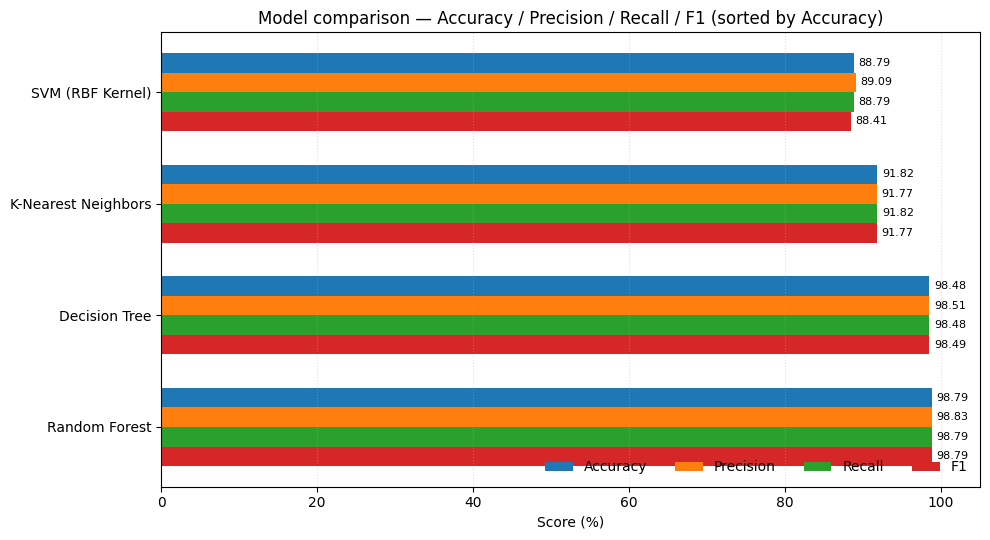

In [ ]:
# === Horizontal grouped bars: models on Y (sorted), metrics on X ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Build metrics_df from existing predictions if needed
if 'metrics_df' not in globals():
    rows = []
    for name, y_pred in y_preds.items():  # y_preds must exist from your trained models
        acc = accuracy_score(y_test, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average="weighted", zero_division=0
        )
        rows.append([name, acc*100, prec*100, rec*100, f1*100])
    metrics_df = pd.DataFrame(rows, columns=["Model","Accuracy","Precision","Recall","F1"]) \
                   .set_index("Model").round(2)

# Choose metric to sort by
sort_by = "Accuracy"  # or "F1", "Precision", "Recall"
mdf = metrics_df.sort_values(sort_by, ascending=True)  # ascending=True so top is best at the top after invert_yaxis

metrics = ["Accuracy","Precision","Recall","F1"]
y = np.arange(len(mdf))  # one row per model

# Bar thickness for each metric band and offsets to center the 4 bars per model
band = 0.70           # total band height per model row
h = band / len(metrics)
offsets = (np.arange(len(metrics)) - (len(metrics)-1)/2) * h  # centered around 0

fig, ax = plt.subplots(figsize=(10, 5.5))

# Draw one horizontal bar per metric for each model
for j, m in enumerate(metrics):
    ax.barh(y + offsets[j], mdf[m].values, height=h, label=m)
    # value labels at the end of each bar
    for yi, val in zip(y + offsets[j], mdf[m].values):
        ax.text(val + 0.6, yi, f"{val:.2f}", va="center", ha="left", fontsize=8)

# Axes formatting
ax.set_yticks(y)
ax.set_yticklabels(mdf.index)
ax.set_xlabel("Score (%)")
ax.set_title(f"Model comparison — Accuracy / Precision / Recall / F1 (sorted by {sort_by})")
ax.set_xlim(0, 105)
ax.invert_yaxis()  # best model (by sort_by) appears at the top
ax.grid(axis="x", linestyle=":", alpha=0.4)
ax.legend(ncol=4, loc="lower right", frameon=False)

plt.tight_layout()
plt.show()


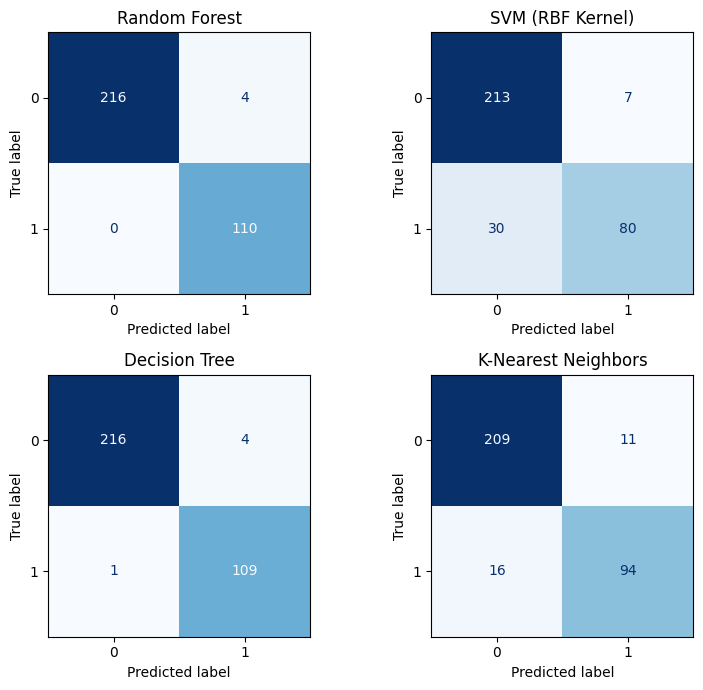

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
fig, axes = plt.subplots(2,2, figsize=(8,7))
axes = axes.ravel()
for ax, (name, y_pred) in zip(axes, y_preds.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
plt.tight_layout()


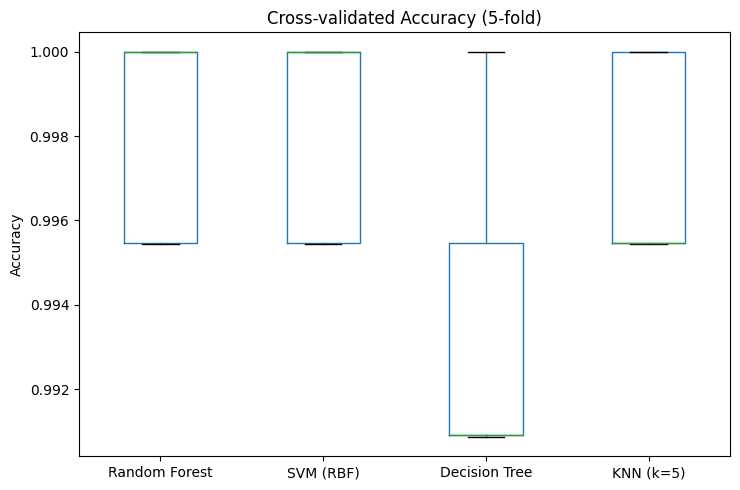

In [57]:
from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_rows = []
for name, pipe in proba_models.items():
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")
    cv_rows.append(pd.Series(scores, name=name))
cv_df = pd.concat(cv_rows, axis=1)
plt.figure(figsize=(7.5,5))
cv_df.boxplot(grid=False)
plt.ylabel("Accuracy"); plt.title("Cross-validated Accuracy (5-fold)")
plt.tight_layout()


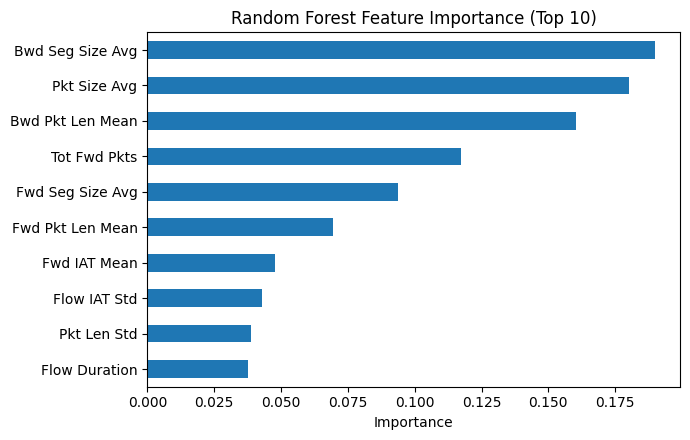

In [58]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4.5))
imp[::-1].plot(kind="barh")
plt.xlabel("Importance"); plt.title("Random Forest Feature Importance (Top 10)")
plt.tight_layout()

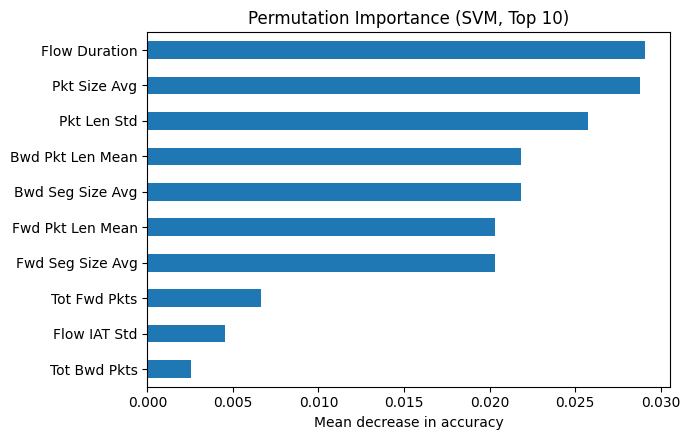

In [59]:
from sklearn.inspection import permutation_importance
svm_pipe.fit(X_train, y_train)
r = permutation_importance(svm_pipe, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
imp = pd.Series(r.importances_mean, index=features).sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4.5))
imp[::-1].plot(kind="barh")
plt.xlabel("Mean decrease in accuracy"); plt.title("Permutation Importance (SVM, Top 10)")
plt.tight_layout()

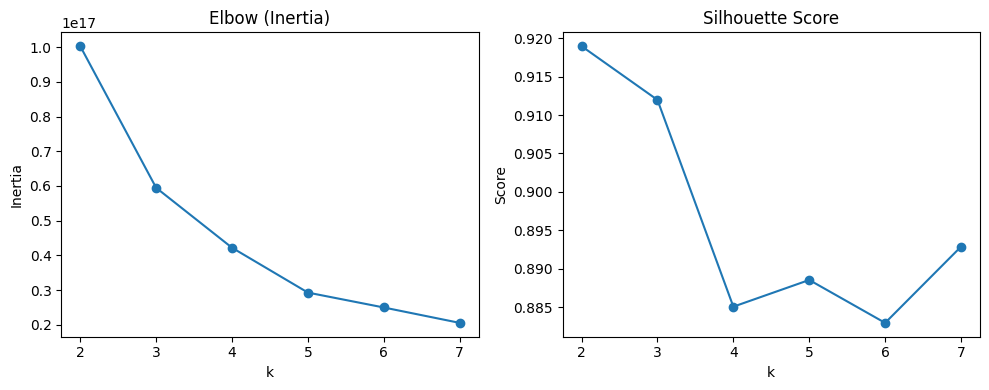

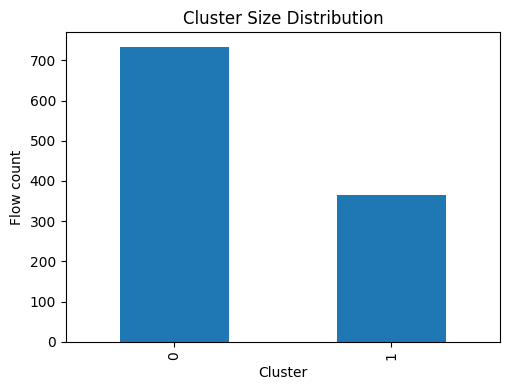

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow + silhouette
ks = range(2,8)
inertia, sil = [], []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)  # use standardized X
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X, km.labels_))
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(list(ks), inertia, marker="o"); ax[0].set_title("Elbow (Inertia)"); ax[0].set_xlabel("k"); ax[0].set_ylabel("Inertia")
ax[1].plot(list(ks), sil, marker="o");    ax[1].set_title("Silhouette Score"); ax[1].set_xlabel("k"); ax[1].set_ylabel("Score")
plt.tight_layout()

# Cluster size bar
counts = pd.Series(df_clustered["Cluster"]).value_counts().sort_index()
plt.figure(figsize=(5.2,4))
counts.plot(kind="bar")
plt.xlabel("Cluster"); plt.ylabel("Flow count"); plt.title("Cluster Size Distribution")
plt.tight_layout()


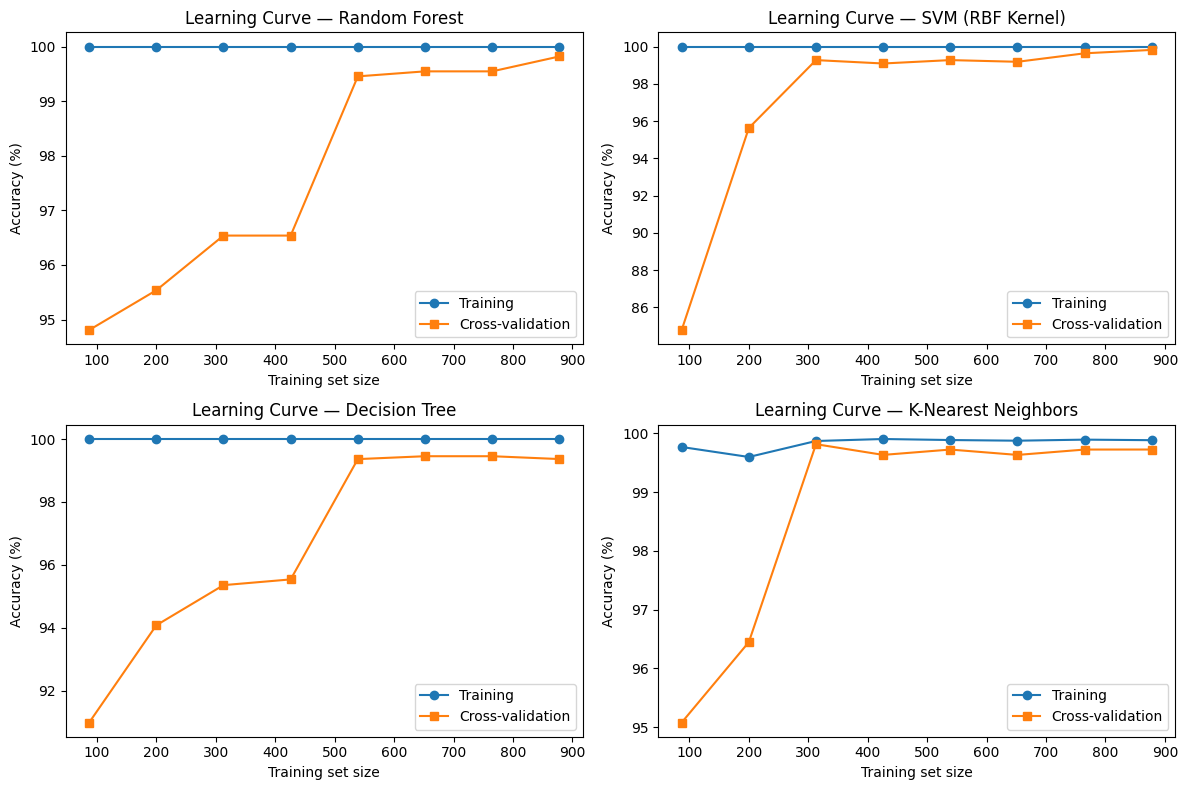

In [66]:
# === Learning curves for all models ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipelines (scale SVM/KNN; RF/DT do not need scaling)
lc_models = {
    "Random Forest": Pipeline([("clf", RandomForestClassifier(n_estimators=200, random_state=42))]),
    "SVM (RBF Kernel)": Pipeline([("sc", StandardScaler()), ("clf", SVC(kernel="rbf", gamma="scale"))]),
    "Decision Tree": Pipeline([("clf", DecisionTreeClassifier(random_state=42))]),
    "K-Nearest Neighbors": Pipeline([("sc", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=5))]),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 8)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, (name, pipe) in zip(axes, lc_models.items()):
    ts, train_scores, val_scores = learning_curve(
        pipe, X, y, cv=cv, scoring="accuracy", train_sizes=train_sizes, n_jobs=-1
    )
    ax.plot(ts, train_scores.mean(axis=1)*100, marker="o", label="Training")
    ax.plot(ts, val_scores.mean(axis=1)*100, marker="s", label="Cross-validation")
    ax.set_xlabel("Training set size")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(f"Learning Curve — {name}")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


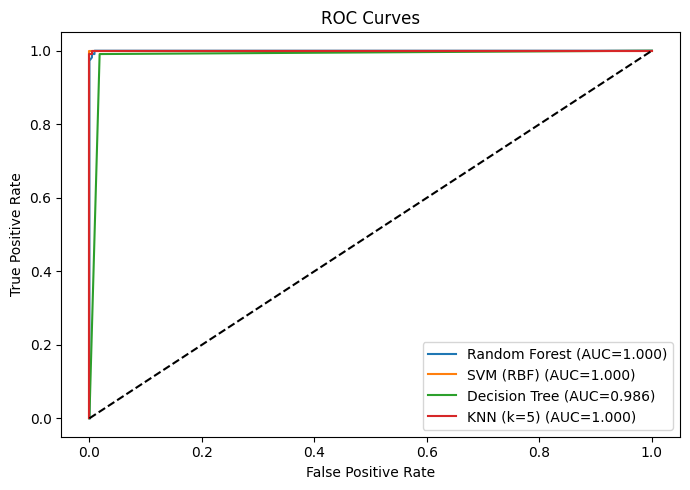

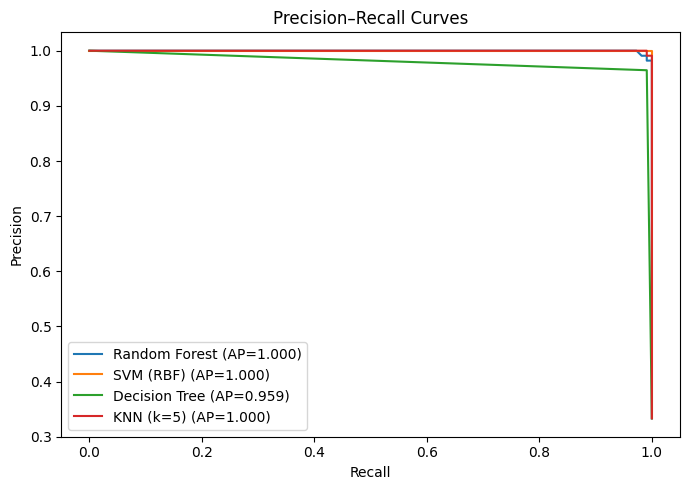

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

proba_models = {
    "Random Forest": Pipeline([("clf", RandomForestClassifier(n_estimators=200, random_state=42))]),
    "SVM (RBF)":     Pipeline([("sc", StandardScaler()), ("clf", SVC(kernel="rbf", probability=True, random_state=42))]),
    "Decision Tree": Pipeline([("clf", DecisionTreeClassifier(random_state=42))]),
    "KNN (k=5)":     Pipeline([("sc", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=5))]),
}

# Fit and get proba scores
probas = {}
for name, pipe in proba_models.items():
    pipe.fit(X_train, y_train)
    probas[name] = pipe.predict_proba(X_test)[:,1]

# ROC
plt.figure(figsize=(7,5))
for name, p in probas.items():
    fpr, tpr, _ = roc_curve(y_test, p)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],"k--"); plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves"); plt.legend(); plt.tight_layout()

# Precision–Recall
plt.figure(figsize=(7,5))
for name, p in probas.items():
    prec, rec, _ = precision_recall_curve(y_test, p)
    ap = average_precision_score(y_test, p)
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curves")
plt.legend(); plt.tight_layout()


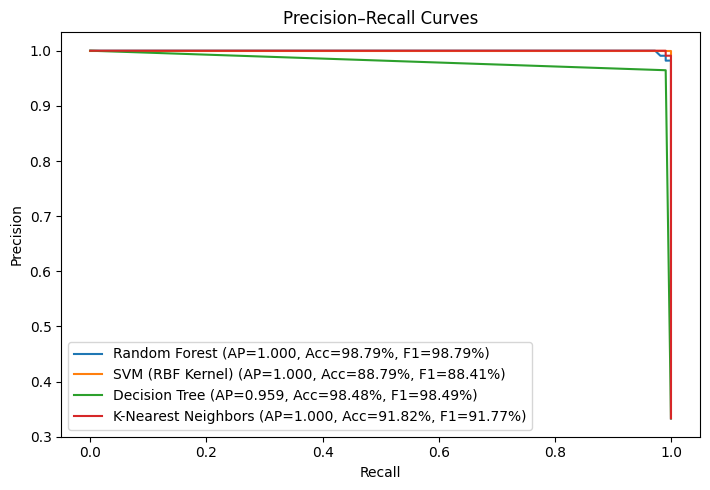

In [ ]:
# === Precision–Recall curves with AP + (Acc, F1) shown in legend ===
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score

# Probabilistic versions (SVC needs probability=True; scale SVM/KNN)
proba_models = {
    "Random Forest": Pipeline([("clf", RandomForestClassifier(n_estimators=200, random_state=42))]),
    "SVM (RBF Kernel)": Pipeline([("sc", StandardScaler()), ("clf", SVC(kernel="rbf", probability=True, random_state=42))]),
    "Decision Tree": Pipeline([("clf", DecisionTreeClassifier(random_state=42))]),
    "K-Nearest Neighbors": Pipeline([("sc", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=5))]),
}

# Fit and get positive-class probabilities
probas = {}
for name, pipe in proba_models.items():
    pipe.fit(X_train, y_train)
    probas[name] = pipe.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7.2, 5))
for name, p in probas.items():
    prec, rec, _ = precision_recall_curve(y_test, p)
    ap = average_precision_score(y_test, p)
    # Pull Acc/F1 from metrics_df for the legend
    acc = float(metrics_df.loc[name, "Accuracy"])
    f1  = float(metrics_df.loc[name, "F1"])
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f}, Acc={acc:.2f}%, F1={f1:.2f}%)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves")
plt.legend()
plt.tight_layout()
plt.show()


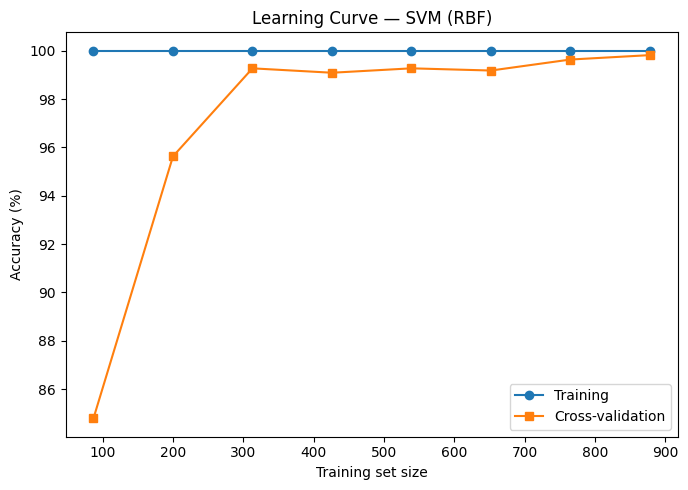

In [53]:
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.pipeline import Pipeline

svm_pipe = Pipeline([("sc", StandardScaler()), ("clf", SVC(kernel="rbf", gamma="scale"))])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Now X and y have the same length
train_sizes, train_scores, val_scores = learning_curve(
    svm_pipe, X, y, cv=cv, scoring="accuracy", train_sizes=np.linspace(0.1,1.0,8), n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_scores.mean(axis=1)*100, marker="o", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1)*100, marker="s", label="Cross-validation")
plt.xlabel("Training set size")
plt.ylabel("Accuracy (%)")
plt.title("Learning Curve — SVM (RBF)")
plt.legend()
plt.tight_layout()
plt.show()

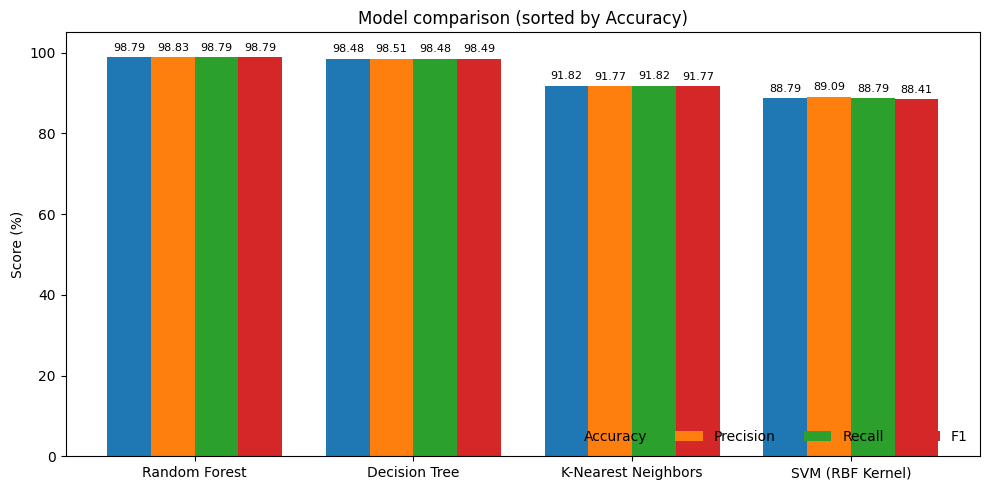

In [70]:
# === One chart: Accuracy + Precision + Recall + F1 for all models (grouped & sorted) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Build metrics_df from your predictions if it doesn't exist yet
if 'metrics_df' not in globals():
    rows = []
    for name, y_pred in y_preds.items():  # uses your existing y_preds
        acc = accuracy_score(y_test, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average="weighted", zero_division=0
        )
        rows.append([name, acc*100, prec*100, rec*100, f1*100])
    metrics_df = pd.DataFrame(rows, columns=["Model","Accuracy","Precision","Recall","F1"]) \
                   .set_index("Model").round(2)

# Choose metric to sort by: "Accuracy", "Precision", "Recall", or "F1"
sort_by = "Accuracy"   # change to "F1" if preferred
mdf = metrics_df.sort_values(sort_by, ascending=False)

metrics = ["Accuracy","Precision","Recall","F1"]
x = np.arange(len(mdf))      # positions for models
width = 0.20                 # bar width

fig, ax = plt.subplots(figsize=(10, 5))

# Grouped bars (one group per model; one bar per metric)
for j, m in enumerate(metrics):
    bars = ax.bar(x + (j - 1.5)*width, mdf[m].values, width, label=m)
    # value labels
    for b in bars:
        h = b.get_height()
        ax.annotate(f"{h:.2f}",
                    xy=(b.get_x() + b.get_width()/2, h),
                    xytext=(0, 3), textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(mdf.index, rotation=0)
ax.set_ylabel("Score (%)")
ax.set_title(f"Model comparison (sorted by {sort_by})")
ax.legend(ncol=4, loc="lower right", frameon=False)
ax.set_ylim(0, 105)

plt.tight_layout()
plt.show()


Shapes -> X: (1098, 14)  y: (1098,)


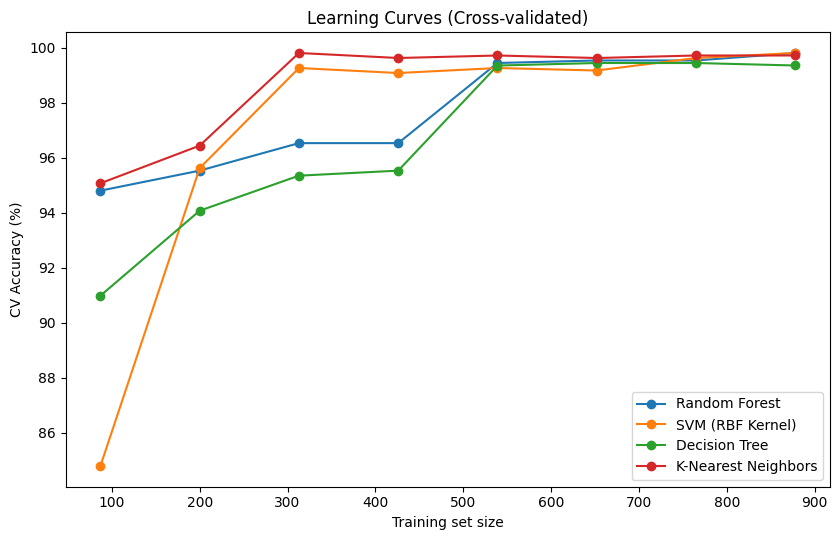

In [ ]:
# --- Rebuild X and y safely (no name collisions) ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensure features/labels align by index
common_idx = df_scaled_preview.index.intersection(df_clustered.index)
X_data    = df_scaled_preview.loc[common_idx, features].to_numpy()
y_labels  = df_clustered.loc[common_idx, "Cluster"].to_numpy()

print("Shapes -> X:", X_data.shape, " y:", y_labels.shape)  # should be (1098, 14) and (1098,)

# Pipelines (scale SVM/KNN; trees/forest don't need scaling)
lc_models = {
    "Random Forest": Pipeline([("clf", RandomForestClassifier(n_estimators=200, random_state=42))]),
    "SVM (RBF Kernel)": Pipeline([("sc", StandardScaler()), ("clf", SVC(kernel="rbf", gamma="scale"))]),
    "Decision Tree": Pipeline([("clf", DecisionTreeClassifier(random_state=42))]),
    "K-Nearest Neighbors": Pipeline([("sc", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=5))]),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 8)

# One figure: validation accuracy vs training size (one line per model)
plt.figure(figsize=(8.5, 5.5))
for name, pipe in lc_models.items():
    ts, train_scores, val_scores = learning_curve(
        pipe, X_data, y_labels, cv=cv, scoring="accuracy", train_sizes=train_sizes, n_jobs=-1
    )
    plt.plot(ts, val_scores.mean(axis=1) * 100, marker="o", label=name)

plt.xlabel("Training set size")
plt.ylabel("CV Accuracy (%)")
plt.title("Learning Curves (Cross-validated)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


,Unscaled,Scaled,Delta (Scaled - Unscaled)
Model,,,
Random Forest,99.82,99.82,0.00
SVM (RBF),91.53,99.82,8.29
Decision Tree,99.36,99.36,0.00
KNN (k=5),93.62,99.73,6.10


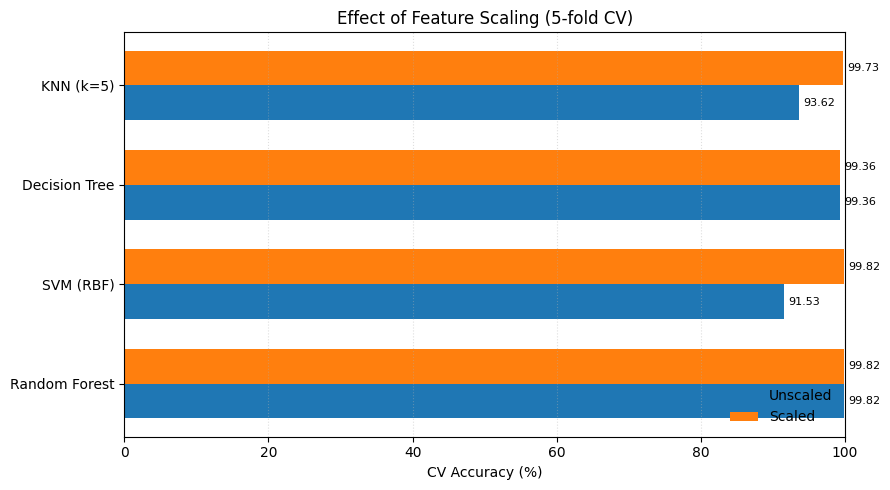

In [ ]:
# --- Effect of scaling on all four models (5-fold CV) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1) RAW features aligned to labels
idx = df_filtered.index.intersection(df_clustered.index)
X_raw = df_filtered.loc[idx, features].to_numpy()
y_raw = df_clustered.loc[idx, "Cluster"].to_numpy()

# 2) Models
base_models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)":     SVC(kernel="rbf", gamma="scale"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=5)":     KNeighborsClassifier(n_neighbors=5),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_mean(model):
    return cross_val_score(model, X_raw, y_raw, cv=cv, scoring="accuracy", n_jobs=-1).mean() * 100

# 3) Unscaled vs Scaled for each model
rows = []
for name, clf in base_models.items():
    acc_unscaled = cv_mean(clf)
    acc_scaled   = cv_mean(Pipeline([("sc", StandardScaler()), ("clf", clf)]))
    rows.append([name, round(acc_unscaled, 2), round(acc_scaled, 2), round(acc_scaled - acc_unscaled, 2)])

res = pd.DataFrame(rows, columns=["Model", "Unscaled", "Scaled", "Delta (Scaled - Unscaled)"]).set_index("Model")
display(res)

# 4) Grouped horizontal bars
fig, ax = plt.subplots(figsize=(9, 5))
idx = np.arange(len(res))
h = 0.35

ax.barh(idx - h/2, res["Unscaled"], height=h, label="Unscaled")
ax.barh(idx + h/2, res["Scaled"],   height=h, label="Scaled")

# value labels
for i, (u, s) in enumerate(zip(res["Unscaled"], res["Scaled"])):
    ax.text(u + 0.6, i - h/2, f"{u:.2f}", va="center", ha="left", fontsize=8)
    ax.text(s + 0.6, i + h/2, f"{s:.2f}", va="center", ha="left", fontsize=8)

ax.set_yticks(idx)
ax.set_yticklabels(res.index)
ax.set_xlabel("CV Accuracy (%)")
ax.set_title("Effect of Feature Scaling (5-fold CV)")
ax.set_xlim(0, 100)
ax.legend(loc="lower right", frameon=False)
ax.grid(axis="x", linestyle=":", alpha=0.4)

plt.tight_layout()
plt.show()
